# Correlations

In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import statsmodels.api as sm
import statistics
import os 
from scipy.stats import norm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from numpy.random import randn
import plotly.express as px

## Correlation statistics 

Lets simulate some data randomly:

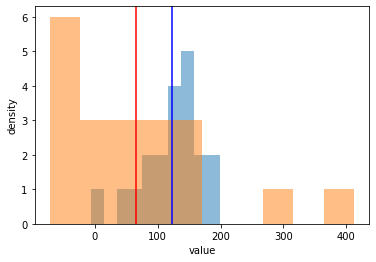

In [8]:
s1 = 50 * randn(20) + 100
s2 = s1+ (100 * randn(20) - 50)


plt.hist(s1,alpha=0.5)
plt.hist(s2,alpha=0.5)


plt.xlabel("value")
plt.ylabel("density")
plt.axvline(statistics.mean(s1), color="blue")
plt.axvline(statistics.mean(s2), color="red")



This plot shows us that they are reasonably normally distributed.  
These data are now matched - information we are loosing with this visualisation!

<AxesSubplot:xlabel='s1', ylabel='s2'>

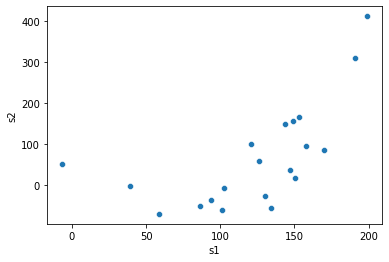

In [9]:
df = pd.DataFrame({'s1':s1, 's2':s2})
sns.scatterplot(x=df['s1'],y=df['s2'])

And with a regression line + confidence intervals

<AxesSubplot:xlabel='s1', ylabel='s2'>

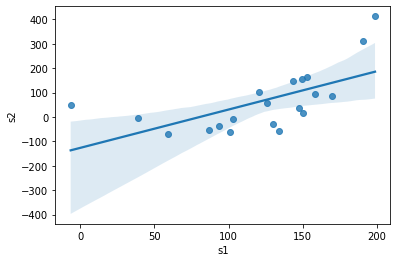

In [10]:
sns.regplot(x=df['s1'],y=df['s2'])

Because we can assume normal distribution for each of the dimensions separately, Pearson correlation is an appropriate correlation statistic. 

In [11]:
st.pearsonr(x=df['s1'],y=df['s2'])

(0.6244612195092363, 0.003248337715183149)

Although here we do not have to use non-parametric statistics, lets have a look how it perfroms with Spearman.

How do the data look like, if we consider ranks?

<AxesSubplot:xlabel='s1', ylabel='s2'>

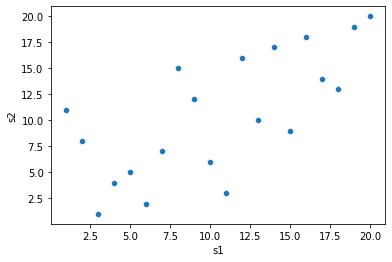

In [15]:
df4 = pd.DataFrame({'s1':st.rankdata(df[['s1']]),'s2':st.rankdata(df[['s2']])})
sns.scatterplot(x=df4['s1'],y=df4['s2'])


<AxesSubplot:xlabel='s1', ylabel='s2'>

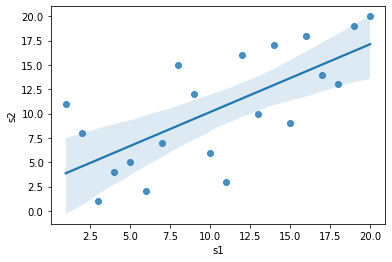

In [14]:
sns.regplot(x=df4['s1'],y=df4['s2'])

Here you can already see that the ranks do correlate. The density of the points is inverting, because the ranks correlate less clearly, where the original distribution was more crowded. As a result the extreme values loose power and the points in the middle gain power, which may affect the outcome of the statistics. On the other hand it is more robust to the effects of the extreme values. 

In [16]:
st.spearmanr(a=df['s1'],b=df['s2'])

SpearmanrResult(correlation=0.6977443609022556, pvalue=0.0006253881635147668)

The correlation coefficient is actually not much less than from the parametric approach. 

What to do with multiple dimensions?

In [37]:
df = pd.DataFrame({'s1':s1, 's2':s2,'s3':s3, 's4':s4})
px.scatter_matrix(df)

Exercise: How do these samples relate to each other? Can you use the correlation as a measure to group them and visualise their relationship in a heatmap for example?  
How does the correlation relate to whether the distributions are different? How are they connected?